In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(ROOT.RDataFrame("edep", "/Users/yuntse/data/coherent/preLArTPC/geant4/nueArCC_sns_yDir_g4_00.root").AsNumpy())

In [3]:
df1 = df.groupby('event')

In [4]:
nEvts = len(df1)
# nEvts = 2
confineLength = np.array([10., 20., 30., 50., 60., 100., 195.])

In [5]:
EFrac = np.zeros((nEvts, len(confineLength)))
EEFrac = np.zeros((nEvts, len(confineLength)))
Ealldep = np.zeros(nEvts)
ETotal = np.zeros(nEvts)
for iEvt in range( nEvts ):
    Evt = df[df.event == iEvt]
    StartingPrimaries = Evt.loc[Evt[Evt.motherID==0].groupby('trackID').startE.idxmax()]
    totalE = sum(StartingPrimaries.startE) - 938.27208816 * sum(StartingPrimaries.pdg == 2212) - 939.56542052 * sum(StartingPrimaries.pdg == 2112) - sum(StartingPrimaries[StartingPrimaries.pdg == 12].startE)
    VisibleParticles = ~Evt.pdg.isin((12, 22, 2112))
    Ealldep[iEvt] = Evt[VisibleParticles]['dE'].sum()
    ETotal[iEvt] = totalE
    for iSize, size in enumerate(confineLength):
        r = size * 10 / 2
        ContainedParticles = (Evt.startX.abs()<r)&(Evt.startY.abs()<r)&(Evt.startZ.abs()<r)
        Econf = Evt[VisibleParticles&ContainedParticles]['dE'].sum()
        # print(r, Ealldep/totalE, Econf/totalE)
        primaryEID = Evt[(Evt.motherID==0)&(Evt.pdg==11)].trackID.unique()[0]
        PrimaryE = Evt.trackID == primaryEID
        totalEE = Evt[PrimaryE]['startE'].max()
        EEconf = Evt[PrimaryE&ContainedParticles]['dE'].sum()
        EFrac[iEvt, iSize] = Econf/totalE
        EEFrac[iEvt, iSize] = EEconf/totalEE
        # print(totalEE, Econf, EEconf, EEconf/totalEE)
EFrac = pd.DataFrame(EFrac, columns=map(str, confineLength))
EEFrac = pd.DataFrame(EEFrac, columns=map(str, confineLength))
EFrac

,10.0,20.0,30.0,50.0,60.0,100.0,195.0
0,0.677346,0.784266,0.890561,0.965670,0.972227,0.983384,0.983384
1,0.666934,0.692543,0.707724,0.814335,0.817217,0.864426,0.864426
2,0.390814,0.718385,0.752217,0.765049,0.838996,0.969279,0.988134
3,0.541516,0.624132,0.624170,0.624170,0.624981,0.729784,0.985303
4,0.426137,0.878586,0.968491,0.987244,0.987244,0.987244,0.987244
...,...,...,...,...,...,...,...
9995,0.621334,0.859626,0.899163,0.965162,0.965162,0.984821,0.984821
9996,0.345505,0.381225,0.421700,0.572325,0.581963,0.648022,0.980415
9997,0.337388,0.398567,0.949958,0.975202,0.980250,0.987018,0.987018
9998,0.345357,0.345409,0.352823,0.435735,0.523584,0.574444,0.742887


In [6]:
sum(Ealldep > ETotal)

184

In [7]:
Masses = {
          2212: 938.27208816,
          2112: 939.56542052,
            11:     0.511,
            12:     0.0,
            22:     0.0,
    1000180360:    36*939,
    1000180370:    37*939,
    1000180380:    38*939,
    1000180390:    39*939,
    1000180391:    39*939,
    1000180400:    40*939,
    1000180410:    41*939,
}
def getMass(g): return np.fromiter(map(Masses.__getitem__, g), count=len(g), dtype=float)

In [8]:
df['m'] = getMass(df.pdg.abs())

In [9]:
StartingParticles = df.iloc[df[(df.event == 23) & (df.motherID == 0)].groupby('trackID').startE.idxmax()]
StartingParticles

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID,m
4069,0.000000,0.000000,4000.000000,0.000000,23,0,12,37.089192,0.0,0.0,0.0,1,0.000000
3961,4.237011,-16.785327,-15.439817,-8.479990,23,0,11,22.545972,0.0,0.0,0.0,2,0.511000
3958,2.063420,0.076910,-0.053832,-0.116200,23,0,2212,941.257440,0.0,0.0,0.0,3,938.272088
3939,0.000000,9.139907,-26.596357,4.711526,23,0,22,1.309860,0.0,0.0,0.0,4,0.000000
3919,0.000000,-3.960459,-3.520964,-5.221530,23,0,22,1.514520,0.0,0.0,0.0,5,0.000000


In [100]:
Event23 = df[df.event == 23].sort_values(['trackID', 'startE'], ascending=[True,False])
with pd.option_context('display.max_rows', None, 'display.max_columns', None): display(Event23)

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID,m
4008,0.000000,0.000000,0.000000,4000.000000,23,0,12,33.501690,0.000000,0.000000,0.000000,1,0.000000
4009,0.000000,0.000000,0.000000,30000.000000,23,0,12,33.501690,0.000000,0.000000,4000.000000,1,0.000000
3877,0.703943,-0.833528,-3.718578,-1.732033,23,0,11,24.524013,0.000000,0.000000,0.000000,2,0.511000
3878,0.742856,-2.114433,-7.319633,-3.298446,23,0,11,23.159910,-0.833528,-3.718578,-1.732033,2,0.511000
3879,0.622228,-3.007539,-10.497411,-4.970899,23,0,11,21.870565,-2.114433,-7.319633,-3.298446,2,0.511000
3880,2.153635,-5.298981,-20.367338,-9.297203,23,0,11,20.839448,-3.007539,-10.497411,-4.970899,2,0.511000
3881,2.793074,-6.368923,-34.130864,-13.831286,23,0,11,18.414688,-5.298981,-20.367338,-9.297203,2,0.511000
3882,2.139641,-9.002578,-43.910678,-15.746848,23,0,11,9.390432,-6.368923,-34.130864,-13.831286,2,0.511000
3883,1.799540,-13.588413,-50.352109,-16.698089,23,0,11,7.250791,-9.002578,-43.910678,-15.746848,2,0.511000
3884,1.594059,-18.644165,-53.356478,-15.678356,23,0,11,5.451251,-13.588413,-50.352109,-16.698089,2,0.511000


In [101]:
Mothers = Event23.motherID.unique()

In [104]:
Event23[~Event23.trackID.isin(Mothers)].groupby('trackID').head(1)

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID,m
4008,0.000000,0.000000,0.000000,4000.000000,23,0,12,33.501690,0.000000,0.000000,0.000000,1,0.000
3824,0.002376,-430.427486,-74.062243,-481.550003,23,3,1000180410,38149.006488,-430.427486,-74.062243,-481.550003,7,38499.000
3831,0.041520,-427.475806,-75.905661,-486.884502,23,6,11,0.552519,-427.481025,-75.899591,-486.881154,8,0.511
3830,0.028403,-436.442247,-58.089190,-497.620902,23,6,11,0.539402,-436.438982,-58.090667,-497.618255,9,0.511
3829,0.094169,-423.468038,-51.099432,-490.363147,23,6,11,0.605168,-423.476753,-51.064943,-490.369200,10,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4005,0.113651,-9.177509,-18.378476,30.978162,23,31,11,0.624650,-9.165983,-18.342571,30.945731,87,0.511
4004,0.026370,-2.230771,26.207400,37.712107,23,31,11,0.537369,-2.231004,26.205384,37.708769,88,0.511
4003,0.036208,1.592321,45.380161,9.181524,23,31,11,0.547207,1.592877,45.374065,9.184540,89,0.511
4002,0.019342,8.877427,23.245454,2.142861,23,31,11,0.530341,8.876611,23.246598,2.144632,90,0.511


25.217193996680884

In [60]:
Event23.groupby('pdg').sum()

,dE,endX,endY,endZ,event,motherID,startE,startX,startY,startZ,trackID
pdg,,,,,,,,,,,
-11,1.581650,-102.066105,-453.162314,-131.845772,115,175,6.511159,-99.589837,-450.455065,-130.729502,200
11,28.583322,-23135.594625,-11680.656603,-10678.654928,2392,2417,225.864494,-23104.918071,-11623.430699,-10670.958298,4247
12,0.000000,0.000000,0.000000,34000.000000,46,0,67.003379,0.000000,0.000000,4000.000000,2
22,0.042008,-16608.085877,-10499.551679,-9261.438254,1702,1200,26.376649,-15400.478735,-9448.140251,-9407.081774,2274
2112,0.030421,-1314.024673,-596.635618,-2072.147506,92,0,3758.709181,-883.597187,-522.573375,-1590.597503,12
1000180410,0.002376,-430.427486,-74.062243,-481.550003,23,3,38149.006488,-430.427486,-74.062243,-481.550003,7


In [58]:
Event23.groupby('trackID').apply(lambda g: max(g.startE)-sum(g.dE))

trackID
1      33.501690
2       8.822290
3     939.662760
4       5.674826
5       0.345429
         ...    
87      0.510999
88      0.510999
89      0.510999
90      0.510999
91      0.510999
Length: 91, dtype: float64

In [59]:
Event23.dE.sum()

30.23977744666732

array([[<Axes: title={'center': '10.0'}>,
        <Axes: title={'center': '20.0'}>,
        <Axes: title={'center': '30.0'}>],
       [<Axes: title={'center': '50.0'}>,
        <Axes: title={'center': '60.0'}>,
        <Axes: title={'center': '100.0'}>],
       [<Axes: title={'center': '195.0'}>, <Axes: >, <Axes: >]],
      dtype=object)

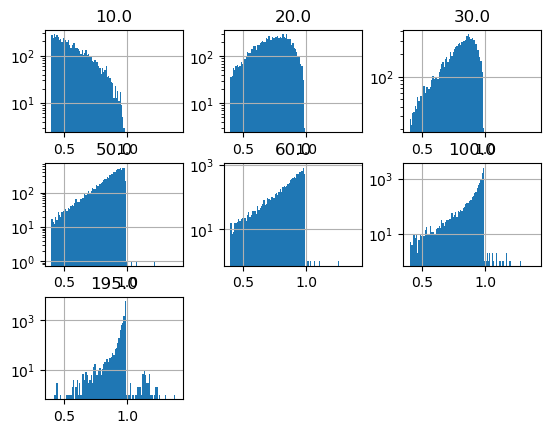

In [10]:
EFrac.hist(bins=np.arange(0.4, 1.4, 0.01), log=True)

In [11]:
EFrac.describe()

,10.0,20.0,30.0,50.0,60.0,100.0,195.0
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.493032,0.704822,0.762893,0.832654,0.859103,0.923104,0.969001
std,0.159364,0.159697,0.156062,0.141309,0.132123,0.100417,0.047003
min,0.030049,0.039501,0.039501,0.039501,0.039501,0.043778,0.188034
25%,0.371774,0.612304,0.681907,0.773070,0.812124,0.912186,0.966965
50%,0.467098,0.729197,0.798740,0.875344,0.901997,0.961126,0.982004
75%,0.594833,0.826195,0.879032,0.934997,0.951966,0.980335,0.985923
max,0.974524,0.982555,0.985009,1.219569,1.254262,1.274516,1.372187


In [12]:
EEFrac.describe()

,10.0,20.0,30.0,50.0,60.0,100.0,195.0
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.459477,0.617807,0.629995,0.630142,0.630142,0.630142,0.630142
std,0.162121,0.168687,0.172605,0.172745,0.172745,0.172745,0.172745
min,0.028007,0.028007,0.028007,0.028007,0.028007,0.028007,0.028007
25%,0.342819,0.514716,0.521274,0.521274,0.521274,0.521274,0.521274
50%,0.426115,0.628655,0.650494,0.650494,0.650494,0.650494,0.650494
75%,0.545954,0.743342,0.762969,0.763656,0.763656,0.763656,0.763656
max,0.969702,0.972868,0.972868,0.972868,0.972868,0.972868,0.972868


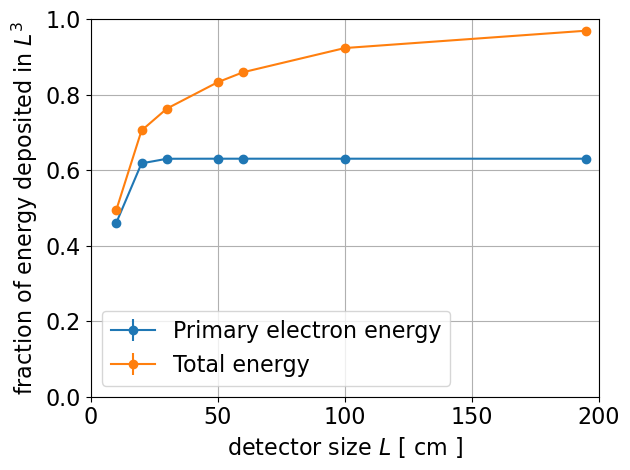

In [13]:
fig, ax = plt.subplots(layout='tight')
ax.errorbar(confineLength, EEFrac.mean(), yerr = EEFrac.std()/np.sqrt(nEvts), fmt = '-o', label = 'Primary electron energy')
ax.errorbar(confineLength, EFrac.mean(), yerr = EFrac.std()/np.sqrt(nEvts), fmt = '-o', label = 'Total energy')
ax.set(
    xlabel="detector size $L$ [ cm ]",
    ylabel="fraction of energy deposited in $L^{3}$",
    )
ax.set_xlabel( "detector size $L$ [ cm ]", fontsize = 16 )
ax.set_ylabel( ylabel="fraction of energy deposited in $L^{3}$", fontsize = 16 )
ax.tick_params(axis = 'x', labelsize = 16)
ax.tick_params(axis = 'y', labelsize = 16)
ax.set_xlim( [0, 200])
ax.set_ylim( [0., 1.] )
ax.grid(":")
ax.legend( fontsize = 16 )
fig.savefig('Containment.pdf')

In [12]:
primaryTrackIDs

array([6, 5, 4, 3, 2], dtype=int32)

In [19]:
primaryEID

array([2], dtype=int32)

In [21]:
totalEE

37.7441844399588

In [24]:
EE30cm = Evt[(Evt.trackID==2)&(Evt.startX<r)&(Evt.startX>-r)&(Evt.startY<r)&(Evt.startY>-r)&(Evt.startZ<r)&(Evt.startZ>-r)]['dE']

In [10]:
EEFrac

,10.0,20.0,30.0,50.0,60.0,100.0
0,0.560730,0.560730,0.560730,0.560730,0.560730,0.560730
1,0.710335,0.710335,0.710335,0.710335,0.710335,0.710335
2,0.679824,0.679824,0.679824,0.679824,0.679824,0.679824
3,0.747990,0.747990,0.747990,0.747990,0.747990,0.747990
4,0.441148,0.441148,0.441148,0.441148,0.441148,0.441148
...,...,...,...,...,...,...
9995,0.752722,0.752722,0.752722,0.752722,0.752722,0.752722
9996,0.647525,0.647525,0.647525,0.647525,0.647525,0.647525
9997,0.688680,0.688680,0.688680,0.688680,0.688680,0.688680
9998,0.776679,0.776679,0.776679,0.776679,0.776679,0.776679


In [13]:
Evt[Evt.trackID==2]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
1650075,1.553894,0.454346,-0.990255,1.088761,9999,0,11,27.790506,0.000000,0.000000,0.000000,2
1650076,0.474655,0.640081,-1.417415,1.455817,9999,0,11,25.980079,0.454346,-0.990255,1.088761,2
1650077,2.252863,1.204716,-3.059891,2.769004,9999,0,11,17.566961,0.640081,-1.417415,1.455817,2
1650078,1.541645,1.268818,-3.169465,3.222398,9999,0,11,2.370403,1.204716,-3.059891,2.769004,2
1650079,0.317760,1.300672,-3.184774,3.221256,9999,0,11,0.828759,1.268818,-3.169465,3.222398,2


In [13]:
df[(df.motherID==0)&(df.pdg==11)&(df.startX>50)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
852,0.238938,56.221711,-14.219676,139.113153,4,0,11,7.075784,55.989073,-14.641464,137.661902,2
853,1.492133,57.854900,-11.757934,145.719664,4,0,11,6.830604,56.221711,-14.219676,139.113153,2
854,1.633924,57.934437,-7.014693,142.376259,4,0,11,5.303749,57.854900,-11.757934,145.719664,2
855,0.483738,60.188022,-5.626434,143.358418,4,0,11,3.669825,57.934437,-7.014693,142.376259,2
856,0.570960,61.527374,-3.932292,144.522940,4,0,11,2.407898,60.188022,-5.626434,143.358418,2
857,0.410311,62.054324,-2.321846,144.859795,4,0,11,1.836938,61.527374,-3.932292,144.522940,2
858,0.400407,62.099785,-1.582120,143.969116,4,0,11,1.426628,62.054324,-2.321846,144.859795,2
859,0.290441,61.785622,-1.404531,144.382255,4,0,11,1.026221,62.099785,-1.582120,143.969116,2
860,0.224781,61.828236,-1.551630,144.369804,4,0,11,0.735780,61.785622,-1.404531,144.382255,2
2580,0.571216,59.300563,23.313175,-61.620907,14,0,11,9.156509,58.184328,22.343440,-59.912627,2


In [21]:
df[(df.motherID==0)&(df.pdg==11)&(df.startX<-50)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID


In [22]:
df[(df.motherID==0)&(df.pdg==11)&(df.startY>50)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID


In [23]:
df[(df.motherID==0)&(df.pdg==11)&(df.startY<-50)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID


In [24]:
df[(df.motherID==0)&(df.pdg==11)&(df.startZ>50)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID


In [25]:
df[(df.motherID==0)&(df.pdg==11)&(df.startZ<-50)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID


In [11]:
df[(df.motherID==0)&(df.pdg==12)&(df.startE<15)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
168418,0.0,0.0,0.0,500.0,1035,0,12,14.785854,0.0,0.0,0.0,1
168419,0.0,0.0,0.0,1500.0,1035,0,12,14.785854,0.0,0.0,500.0,1
168420,0.0,0.0,0.0,30000.0,1035,0,12,14.785854,0.0,0.0,1500.0,1
285121,0.0,0.0,0.0,500.0,1749,0,12,10.797196,0.0,0.0,0.0,1
285122,0.0,0.0,0.0,1500.0,1749,0,12,10.797196,0.0,0.0,500.0,1
285123,0.0,0.0,0.0,30000.0,1749,0,12,10.797196,0.0,0.0,1500.0,1
594663,0.0,0.0,0.0,500.0,3640,0,12,14.281332,0.0,0.0,0.0,1
594664,0.0,0.0,0.0,1500.0,3640,0,12,14.281332,0.0,0.0,500.0,1
594665,0.0,0.0,0.0,30000.0,3640,0,12,14.281332,0.0,0.0,1500.0,1
621081,0.0,0.0,0.0,500.0,3795,0,12,14.321127,0.0,0.0,0.0,1


In [13]:
df[(df.event==1035)&(df.motherID==0)&(df.pdg==11)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
168387,0.163414,0.151576,-0.137785,-0.050781,1035,0,11,11.056461,0.000000,0.000000,0.000000,2
168388,3.137428,2.273612,-2.112072,-0.321859,1035,0,11,10.785550,0.151576,-0.137785,-0.050781,2
168389,3.446354,3.842060,-3.484467,0.226687,1035,0,11,7.648122,2.273612,-2.112072,-0.321859,2
168390,0.401963,4.255773,-3.536890,0.164930,1035,0,11,4.201768,3.842060,-3.484467,0.226687,2
168391,1.545418,4.650838,-3.293028,-0.439871,1035,0,11,3.227519,4.255773,-3.536890,0.164930,2
168392,0.875607,4.617746,-3.449569,-0.461460,1035,0,11,1.386606,4.650838,-3.293028,-0.439871,2


In [14]:
df[(df.event==1035)&(df.motherID==2)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
168393,0.000000,5.163266,-5.916740,-3.051855,1035,2,22,0.295495,4.650838,-3.293028,-0.439871,23
168394,0.000000,5.721288,-8.887870,-6.803579,1035,2,22,0.294294,5.163266,-5.916740,-3.051855,23
168395,0.000000,5.774864,-11.093777,-8.195240,1035,2,22,0.284337,5.721288,-8.887870,-6.803579,23
168396,0.000000,6.336595,-15.756481,-10.682085,1035,2,22,0.284337,5.774864,-11.093777,-8.195240,23
168397,0.000000,8.342904,-14.989956,-8.906082,1035,2,22,0.156719,6.336595,-15.756481,-10.682085,23
168398,0.000000,9.434297,-12.268647,-6.964345,1035,2,22,0.147157,8.342904,-14.989956,-8.906082,23
168399,0.000000,9.321711,-12.169089,-6.790948,1035,2,22,0.131981,9.434297,-12.268647,-6.964345,23
168400,0.007117,11.239649,-17.043260,-8.940941,1035,2,22,0.089674,9.321711,-12.169089,-6.790948,23
168408,0.000000,30.559277,12.681179,-34.973990,1035,2,22,0.572286,4.255773,-3.536890,0.164930,22
168409,0.000000,30.396930,16.527591,-44.422508,1035,2,22,0.475009,30.559277,12.681179,-34.973990,22


In [15]:
df[(df.event==3640)&(df.motherID==0)&(df.pdg==11)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
594630,0.272933,-0.268963,-0.084475,-0.108102,3640,0,11,8.774956,0.000000,0.000000,0.000000,2
594631,0.304805,-0.583663,-0.165533,-0.203122,3640,0,11,8.466719,-0.268963,-0.084475,-0.108102,2
594632,3.133770,-2.764667,-0.708939,-0.577802,3640,0,11,8.124179,-0.583663,-0.165533,-0.203122,2
594633,1.339150,-3.280689,0.146492,-1.051918,3640,0,11,4.990409,-2.764667,-0.708939,-0.577802,2
594634,1.207367,-3.816802,0.100790,-1.610097,3640,0,11,3.633672,-3.280689,0.146492,-1.051918,2
594635,0.435799,-3.879028,0.138986,-1.718897,3640,0,11,1.277625,-3.816802,0.100790,-1.610097,2
594636,0.251718,-3.895555,0.156415,-1.714099,3640,0,11,0.762717,-3.879028,0.138986,-1.718897,2


In [16]:
df[(df.event==3795)&(df.motherID==0)&(df.pdg==11)]

,dE,endX,endY,endZ,event,motherID,pdg,startE,startX,startY,startZ,trackID
621072,2.619610,0.973399,-0.321793,1.983532,3795,0,11,8.943250,0.000000,0.000000,0.000000,2
621073,3.560695,1.860099,0.222678,3.381451,3795,0,11,6.147975,0.973399,-0.321793,1.983532,2
621074,1.597861,2.370019,0.373957,3.508746,3795,0,11,2.587280,1.860099,0.222678,3.381451,2
621075,0.087620,2.336262,0.395862,3.479821,3795,0,11,0.989419,2.370019,0.373957,3.508746,2
621076,0.372213,2.320732,0.432219,3.501668,3795,0,11,0.883212,2.336262,0.395862,3.479821,2
